In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [9]:

import matplotlib as mpl
    
import sys  
sys.path.insert(0, '../src/')

from astropy.table import Table

from jsm_datareduc import prep_data
from galhalo import lgMs_D22_dex, dex_sampler, lgMs_D22_det
import galhalo
import os

In [10]:
conv = 1/np.log10(np.exp(1))

stellar_mass = 7
Ndex = 100
Nsamp = 10000
dex = np.linspace(0,3,Ndex)
dist = np.zeros(shape=(Ndex, Nsamp))

for i, val in enumerate(dex):
    dist[i] = conv*np.log10(np.random.lognormal(mean=stellar_mass, sigma=val, size=Nsamp))

real_dist = np.zeros(shape=(Ndex, Nsamp))
for i, val in enumerate(dex):
    real_dist[i] = np.random.lognormal(mean=stellar_mass, sigma=val, size=Nsamp)

ave = np.mean(dist, axis=1)
std = np.std(dist, axis=1)

In [11]:
def avemass(mu, sigma):
    exp = mu + (sigma**2)/2
    return np.exp(exp) # the expectation value

In [12]:
def norm(expt_val, sigma):
    mu = np.log(expt_val) - (sigma**2)/2
    return mu

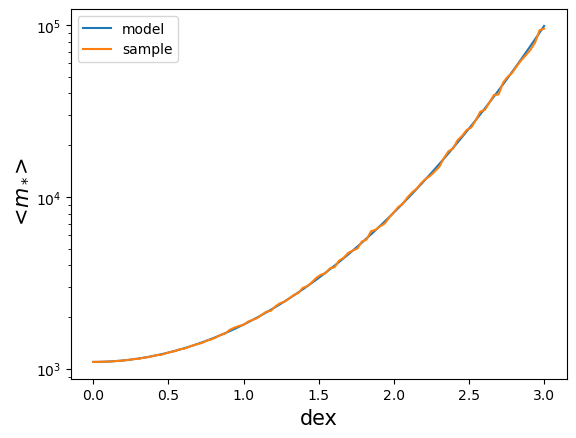

In [13]:
sigma = np.linspace(0,2,50)

plt.plot(dex, avemass(stellar_mass, dex), label="model")
plt.plot(dex, avemass(ave, dex), label="sample")
plt.xlabel("dex", fontsize=15)
plt.ylabel(" <$m_*$>", fontsize=15)
plt.legend()
plt.yscale("log")
plt.savefig("../figures/expectation_value.pdf")
plt.show()


----------

$\log_{10} (M_{*}) = \log_{10} (\epsilon M_{1})+ \alpha \log_{10} (M_{peak}) - \alpha \log_{10}(M_1)$

$ M_{*} = \epsilon M_{1} \left( \frac{M_{peak}}{M_1} \right)^{\alpha}$

$ M_{*} = \left( \epsilon M_{1}^{1-\alpha} \right) \left( M_{peak} \right)^{\alpha} $

$\log_{10} (M_{*}) = \alpha \log_{10} (M_{peak}) + \log_{10}\left( \epsilon M_{1}^{1-\alpha} \right)$

$y = mx + b$, where $a$ is the slope, and $b$ the intercept, is a function of the slope and the normalization 

In [14]:
Mh = prep_data(("../../data/12_4_0/acc_surv_mass.npy"), convert=False, includenan=False)
Ms = prep_data(("../../data/12_4_0/acc_surv_mass.npy"), includenan=False)

halo_mass = Mh[0]
stellar_mass = Ms[0]

### Testing to see if the two methods of sampling are equivalent

In [15]:
def test_conv(lgMs_arr, dex, N_samples):

    scatter = np.random.normal(loc=0, scale=dex, size=(N_samples, lgMs_arr.shape[0]))
    return lgMs_arr + scatter

In [16]:
def test_convlog(lgMs_arr, dex, N_samples):

    sample = np.random.lognormal(lgMs_arr, dex, size=(N_samples, lgMs_arr.shape[0]))
    return np.log10(sample)/np.log10(np.exp(1))

In [17]:
hmm = test_conv(stellar_mass, 1, 10000)
hmmlog = test_convlog(stellar_mass, 1, 10000)

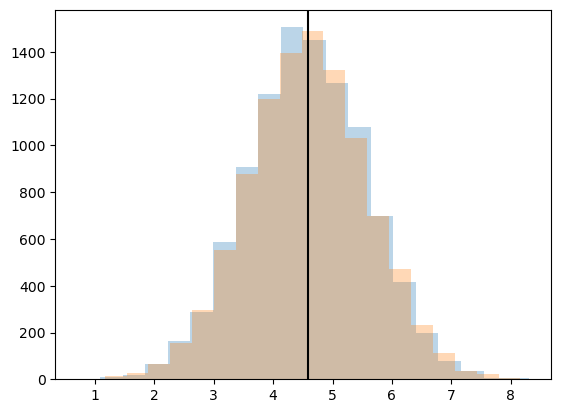

In [18]:
i= 23

plt.hist(hmm[:,i], alpha=0.3, bins=20)
plt.hist(hmmlog[:,i], alpha=0.3,  bins=20)

plt.axvline(stellar_mass[i], color="black")

In [19]:
samp1 = test_conv(stellar_mass, 0.5, 10)[0,:]

samp2 = test_conv(stellar_mass, 1, 10)[0,:]

samp3 = test_conv(stellar_mass, 1.5, 10)[0,:]

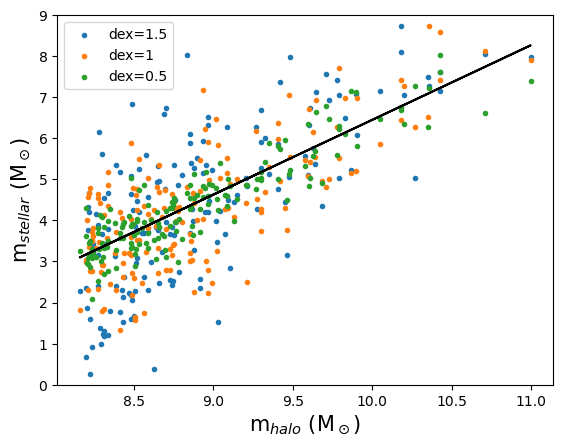

In [20]:
plt.scatter(halo_mass, samp3, marker=".", label="dex=1.5")
plt.scatter(halo_mass, samp2, marker=".", label="dex=1")
plt.scatter(halo_mass, samp1, marker=".", label="dex=0.5")
plt.plot(halo_mass, stellar_mass, color="black")
plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)
plt.ylim(0,9)
plt.legend()
plt.show()

In [21]:
samp1 = test_convlog(stellar_mass, 0.5, 10)[0,:]

samp2 = test_convlog(stellar_mass, 1, 10)[0,:]

samp3 = test_convlog(stellar_mass, 1.5, 10)[0,:]

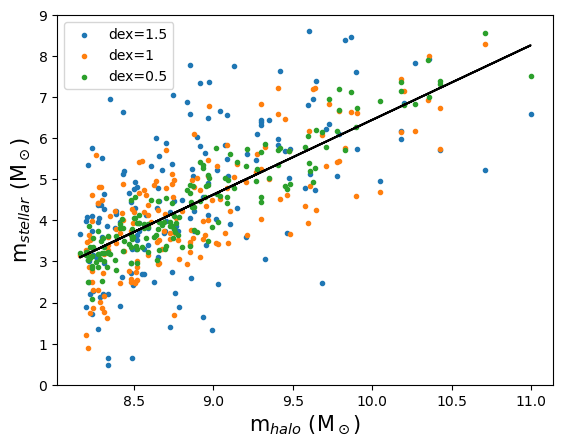

In [22]:
plt.scatter(halo_mass, samp3, marker=".", label="dex=1.5")
plt.scatter(halo_mass, samp2, marker=".", label="dex=1")
plt.scatter(halo_mass, samp1, marker=".", label="dex=0.5")
plt.plot(halo_mass, stellar_mass, color="black")
plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)
plt.legend()
plt.ylim(0,9)
plt.show()

### now moving onto the differnt ways we can normalize the sampling

In [23]:
Mh = prep_data(("../../data/12_4_0/acc_surv_mass.npy"), convert=False, includenan=False)
Ms = prep_data(("../../data/12_4_0/acc_surv_mass.npy"), includenan=False)

halo_mass = Mh[0]
stellar_mass = Ms[0]

In [24]:
def lgMs_D22_test(lgMv, dex):
    """    
    returns the stellar mass [M_sun] plus a random sample of a lognormal distribution defined by dex
    """

    aGK = 0.14*dex**2 + 0.14*dex+ 1.79
    log_e = -1.5
    lgMs = log_e + 12.5 + aGK*lgMv - aGK*12.5

    return lgMs

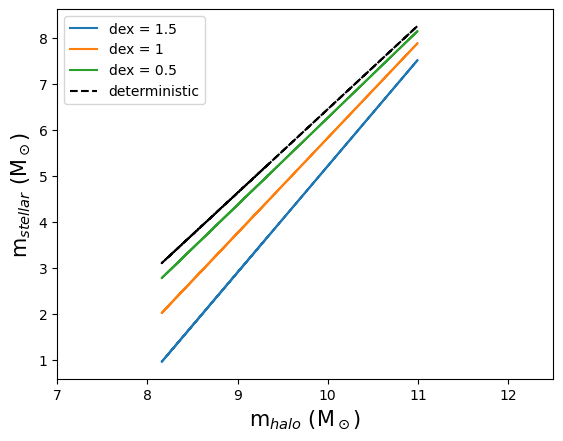

In [25]:
plt.plot(halo_mass, lgMs_D22_test(halo_mass,1.5), label="dex = 1.5")
plt.plot(halo_mass, lgMs_D22_test(halo_mass,1), label="dex = 1")
plt.plot(halo_mass, lgMs_D22_test(halo_mass,0.5) , label="dex = 0.5")

plt.plot(halo_mass, stellar_mass, color="black", label="deterministic", ls="--")
plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)
plt.legend()
plt.xlim(7,12.5)
#plt.savefig("../figures/scaling_SHMR.pdf")
plt.show()

In [26]:
def lgMs_D22_test(lgMv, dex, N_samples, norm=False):
    """    
    returns the stellar mass [M_sun] plus a random sample of a lognormal distribution defined by dex
    """
    log_e = -1.5
    a = 1.82
    lgMs = log_e + 12.5 + a*lgMv - a*12.5

    sample = np.random.lognormal(lgMs, dex, size=(N_samples, lgMs.shape[0]))
    lgMs_mat = np.log10(sample)/np.log10(np.exp(1))

    norm = (dex**2)/4.605
    return lgMs_mat - norm


In [27]:
hmm = lgMs_D22_test(halo_mass, 1.5, N_samples=100)

hmm.shape

(100, 168)

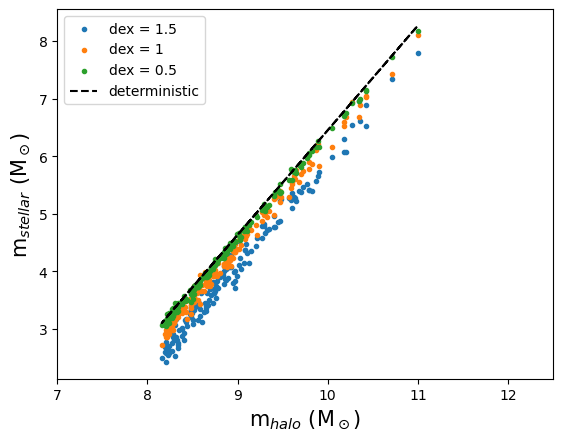

In [28]:
plt.scatter(halo_mass,  np.average(lgMs_D22_test(halo_mass,1.5, N_samples=100), axis=0), marker=".", label="dex = 1.5")
plt.scatter(halo_mass,  np.average(lgMs_D22_test(halo_mass,1, N_samples=100), axis=0) , marker=".", label="dex = 1")
plt.scatter(halo_mass, np.average(lgMs_D22_test(halo_mass,0.5, N_samples=100), axis=0) , marker=".", label="dex = 0.5")

plt.plot(halo_mass, stellar_mass, color="black", label="deterministic", ls="--")
plt.ylabel("m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.xlabel("m$_{halo}$ (M$_\odot$)", fontsize=15)
plt.legend()
plt.xlim(7,12.5)
#plt.savefig("../figures/scaling_SHMR.pdf")
plt.show()

### now checking the mass conservation!

In [37]:
scatter_pix = 15
scatter_range = np.round(np.linspace(0.0,1.5,scatter_pix), 3)

unscaled = np.load("../../data/og_rank.npy")

beta = np.load("../../data/norm_rank.npy")

slope = np.load("../../data/GK_rank.npy")

test = np.load("../../data/test_rank.npy")

det = 11.93399835074119

In [38]:
unscaled

array([11.93399835, 11.94735019, 11.98701002, 12.05262483, 12.14445327,
       12.26425503, 12.40763214, 12.56772217, 12.76702576, 12.97623587,
       13.21202475, 13.44892828, 13.74438427, 14.01586317, 14.30631711])

In [39]:
def percdif(new, old):

    return ((old-new)/old)*100

In [40]:
percdif

<function __main__.percdif(new, old)>

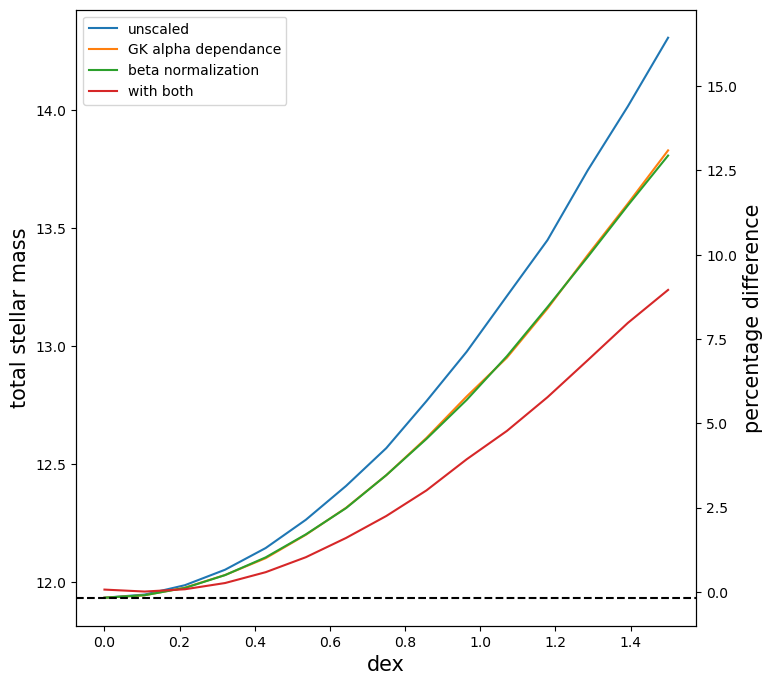

In [41]:
fig, ax1 = plt.subplots(figsize=(8,8))

ax1.plot(scatter_range, unscaled, label="unscaled")
ax1.plot(scatter_range, slope, label="GK alpha dependance")
ax1.plot(scatter_range, beta, label="beta normalization")
ax1.plot(scatter_range, test, label="with both")

ax1.axhline(det, ls="--", color="black")
ax1.set_ylabel("total stellar mass", fontsize=15)
ax1.set_xlabel("dex", fontsize=15)
ax1.legend()


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
#ax2.plot(scatter_range, percdif(det,unscaled))
y1, y2 = ax1.get_ylim()
ax2.set_ylim(percdif(det, y1), percdif(det, y2))
ax2.figure.canvas.draw()    
ax2.set_ylabel('percentage difference', fontsize=15)


plt.show()